# **Multilabel classification using Logistical Regression**

---



In this lab enhancement, the following are done:

1. Explanation of Multilabel classification vs Multiclass classification & Binary relevance to train a logistic regression model
2. Common problem with multilabel data - class imbalance
2. Applying logistic regression on multilabel sets
3. Using 'MultiOutputClassifier' as an alternative to logistic regression
4. Logistic Regression, Sigmoid function and Neural Network for Multiclass classification
5. Performance metrics for multiclass classification
---



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_multilabel_classification
from sklearn.multioutput import MultiOutputClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


In [ ]:
np.set_printoptions(threshold=np.inf)


#Multilabel vs Multiclass

<img src="https://nl.mathworks.com/help/examples/nnet/win64/MultilabelImageClassificationUsingDeepLearningExample_01.png" alt="Example Image">


Multilabel classification is when a data sample is labelled with more than once class. This differs from multiclass classification, where one data sample is only labelled with one class out of many classes.


##Binary Relevance Approach

In the binary relevance approach, each class label is treated as a separate binary classification problem. A separate classifier is trained for each class label, ignoring the presence of other labels in the dataset.

In our example, logistic regression is applied individually to each of the class labels. This would result in probabilities of the class labels being independent from each other, thus each label can have probabilities between 0-1, as shown in the figure above. This is different to multiclass classification where the labels are mutually exclusive and sum up to 1.

In the code below, we are creating a dataset with 20 samples and 3 features. There are also 3 class labels, and each data point can have a maximum of all 3 class labels




In [ ]:
#X, y = make_multilabel_classification(n_classes=3, random_state=6, n_samples=20, n_features=3, n_labels=3)

X = np.array([
    [17., 11., 27.],
    [12.,  5., 19.],
    [ 7., 24., 19.],
    [10., 13., 25.],
    [16., 12., 20.],
    [ 4., 18., 20.],
    [ 6., 15., 23.],
    [18., 16., 26.],
    [11., 15., 27.],
    [ 4., 24., 17.],
    [ 7., 20., 25.],
    [ 7., 16., 24.],
    [12., 13., 26.],
    [ 6., 17., 26.],
    [27., 14., 22.],
    [10., 14., 25.],
    [ 3., 20., 25.],
    [13., 12., 15.],
    [10., 16., 26.],
    [ 7., 14., 21.]
])


y = np.array([
    [0, 0, 1],
    [0, 0, 1],
    [0, 0, 0],
    [1, 0, 1],
    [0, 0, 0],
    [1, 0, 0],
    [1, 0, 0],
    [1, 0, 1],
    [1, 0, 1],
    [0, 1, 0],
    [1, 1, 1],
    [1, 0, 1],
    [1, 0, 1],
    [1, 0, 0],
    [0, 0, 1],
    [1, 1, 1],
    [1, 0, 1],
    [0, 0, 0],
    [1, 0, 1],
    [1, 0, 1]
])


print(X)
print()
print(y)

[[17. 11. 27.]
 [12.  5. 19.]
 [ 7. 24. 19.]
 [10. 13. 25.]
 [16. 12. 20.]
 [ 4. 18. 20.]
 [ 6. 15. 23.]
 [18. 16. 26.]
 [11. 15. 27.]
 [ 4. 24. 17.]
 [ 7. 20. 25.]
 [ 7. 16. 24.]
 [12. 13. 26.]
 [ 6. 17. 26.]
 [27. 14. 22.]
 [10. 14. 25.]
 [ 3. 20. 25.]
 [13. 12. 15.]
 [10. 16. 26.]
 [ 7. 14. 21.]]

[[0 0 1]
 [0 0 1]
 [0 0 0]
 [1 0 1]
 [0 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 1]
 [1 0 1]
 [0 1 0]
 [1 1 1]
 [1 0 1]
 [1 0 1]
 [1 0 0]
 [0 0 1]
 [1 1 1]
 [1 0 1]
 [0 0 0]
 [1 0 1]
 [1 0 1]]


# Class Imbalance Problem

In many multilabel datasets, the problem of class imbalance is very common. Class imbalance in the context of multilabel data, refers to when the distribution of samples among the different classes are unequal. This problem needs to be addressed when you build a model with multilabel data, as many models are unable to handle this imbalance and would be bias towards the class with the highest number of sample.

As you can see below, our toy dataset exhibits class imbalance, where Class 2 has much fewer samples compared to class 1 and class 3.

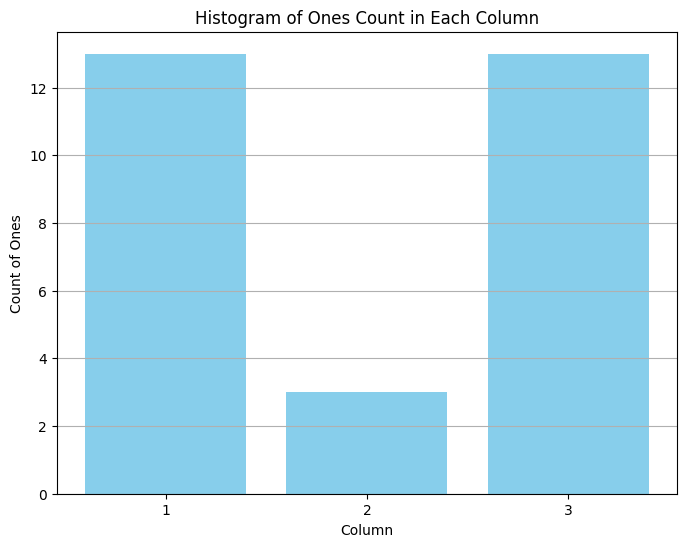

In [ ]:
ones_count = np.sum(y, axis=0)

plt.figure(figsize=(8, 6))
plt.bar(range(1, len(ones_count) + 1), ones_count, color='skyblue')
plt.title('Histogram of Ones Count in Each Column')
plt.xlabel('Column')
plt.ylabel('Count of Ones')
plt.xticks(range(1, len(ones_count) + 1))
plt.grid(axis='y')
plt.show()

#Training a multilabel dataset with SKlearn logistic regression

SKlearn logistic regression only allows for one class label input (binary classification).

Right here, we will be applying the binary relevance approach to train a logistic regression model for each of the 3 individual class labels. We will then compare the output of it to the output from a model using 'MultiOutputClassifier'

In [ ]:
model1 = LogisticRegression()
model1.fit(X, y[:,0])

y_pred1 = model1.predict(X)

p_pred1 = model1.predict_proba(X)

print(f"y = {y[:,0]}")

print(f"y_pred = {y_pred1}")

y = [0 0 0 1 0 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1]
y_pred = [1 0 0 1 0 1 1 0 1 0 1 1 1 1 0 1 1 0 1 1]


In [ ]:
model2 = LogisticRegression()
model2.fit(X, y[:,1])

y_pred2 = model2.predict(X)

p_pred2 = model2.predict_proba(X)

print(f"y = {y[:,1]}")

print(f"y_pred = {y_pred2}")

y = [0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0]
y_pred = [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [ ]:
model3 = LogisticRegression()
model3.fit(X, y[:,2])

y_pred3 = model3.predict(X)

p_pred3 = model3.predict_proba(X)


print(f"y = {y[:,2]}")

print(f"y = {y_pred3}")

y = [1 1 0 1 0 0 0 1 1 0 1 1 1 0 1 1 1 0 1 1]
y = [1 1 0 1 1 0 1 1 1 0 1 1 1 1 1 1 1 0 1 0]


# What is a multioutputclassifier?

The base logisticregression model, as well as many other models like RandomForestClassifier and DecisionTreeClassifier, provided by SKLearn does not support multilabel training

MultiOutputClassifier internally creates one classifier per class label.
For each class label, it fits a separate classifier using the training data for that output. During training, it passes the training features (X) and the corresponding column of the target variable (y) to each classifier.


To make predictions, it passes the test features (X_test) to each classifier.
Each classifier predicts the corresponding column of the class label.
The predictions from all classifiers are then combined into a single output matrix, where each column represents the predictions for a different class label.

In [ ]:
model= MultiOutputClassifier(estimator= LogisticRegression()).fit(X, y)


print(f"y = {y}")

y_pred = model.predict(X)
print(f"y_pred = {y_pred}")


y = [[0 0 1]
 [0 0 1]
 [0 0 0]
 [1 0 1]
 [0 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 1]
 [1 0 1]
 [0 1 0]
 [1 1 1]
 [1 0 1]
 [1 0 1]
 [1 0 0]
 [0 0 1]
 [1 1 1]
 [1 0 1]
 [0 0 0]
 [1 0 1]
 [1 0 1]]
y_pred = [[1 0 1]
 [0 0 1]
 [0 0 0]
 [1 0 1]
 [0 0 1]
 [1 0 0]
 [1 0 1]
 [0 0 1]
 [1 0 1]
 [0 0 0]
 [1 0 1]
 [1 0 1]
 [1 0 1]
 [1 0 1]
 [0 0 1]
 [1 0 1]
 [1 0 1]
 [0 0 0]
 [1 0 1]
 [1 0 0]]


The output of the multioutputclassifier can be shown above. If we compare it to the output of the 3 models shown below, you will see that they are the same.

In [ ]:
y_pred1 = y_pred1.reshape(-1, 1)
y_pred2 = y_pred2.reshape(-1, 1)
y_pred3 = y_pred3.reshape(-1, 1)

y_pred_combined = np.concatenate((y_pred1, y_pred2, y_pred3), axis=1)

print(f"y_pred_combined = {y_pred_combined}")



y_pred_combined = [[1 0 1]
 [0 0 1]
 [0 0 0]
 [1 0 1]
 [0 0 1]
 [1 0 0]
 [1 0 1]
 [0 0 1]
 [1 0 1]
 [0 0 0]
 [1 0 1]
 [1 0 1]
 [1 0 1]
 [1 0 1]
 [0 0 1]
 [1 0 1]
 [1 0 1]
 [0 0 0]
 [1 0 1]
 [1 0 0]]


#Relation to neural network/perceptron models


<img src="https://miro.medium.com/v2/resize:fit:1400/1*dRpj8ta5fL8V_eUYQLGzCA.png" alt="Example Image">

In logistic regression, the sigmoid function (also known as the logistic function) is used to map input features to a probability between 0 and 1. The sigmoid function is defined as:

$f(z) = \frac{1}{1+e^{-z}}$


$z$ represents the linear combination of input features and their corresponding weights.


When we train a neural network with multilabel datasets, we utilise the sigmoid activation function in the output layer. Each neuron in the output layer corresponds to one class label, and the sigmoid activation function is applied independently to each neuron. This allows each neuron to output a probability indicating the likelihood of the corresponding class being present in the input sample. An illustration of multilabel classification for a neural network can be illustrated in the image above.


In this example, because the logistic regression is applied to each of the class labels individually, that means that 3 different logit equations ($z$) are produced. In the context of neural networks, when we train a neural network with multilabel data, we must ensure that a sigmoid function is used.


In [ ]:
def probability(logits):
  probs=[]
  for z in logits:
    prob = 1/(1+np.exp(-z))
    probs.append(prob)

  return probs

logits1 = model1.decision_function(X)
probs1 = probability(logits1)
intercept1 = model1.intercept_[0]  # Extract the intercept
coefficients1 = model1.coef_[0]     # Extract the coefficients


logits2 = model2.decision_function(X)
probs2 = probability(logits2)
intercept2 = model2.intercept_[0]  # Extract the intercept
coefficients2 = model2.coef_[0]     # Extract the coefficients


logits3 = model3.decision_function(X)
probs3 = probability(logits3)
intercept3 = model3.intercept_[0]  # Extract the intercept
coefficients3 = model3.coef_[0]     # Extract the coefficients



In [ ]:
def create_sigmoid(label_no, logits, probs, intercept, coefficients):
  #Define the sigmoid function
  def sigmoid(z):
      return 1 / (1 + np.exp(-z))

  #Generate values for z
  z_values = np.linspace(-10, 10, 100)  #Range of values for z

  #Calculate corresponding probabilities using the sigmoid function
  probabilities = sigmoid(z_values)



  #Plot the sigmoid function
  plt.figure(figsize=(8, 6))
  plt.plot(z_values, probabilities, label='Logistic Sigmoid', color='blue')
  plt.scatter(logits, probs, color='red', label='Data Points')

  equation_str = f"z{label_no} = {intercept:.4f} + " + " + ".join([f"{coef:.4f} * x{i+1}" for i, coef in enumerate(coefficients)])
  plt.title(equation_str)

  plt.xlabel('z')
  plt.ylabel('Probability')
  plt.axhline(y=0.5, color='red', linestyle='--', label='Threshold (0.5)')
  plt.legend()
  plt.grid(True)
  plt.show()


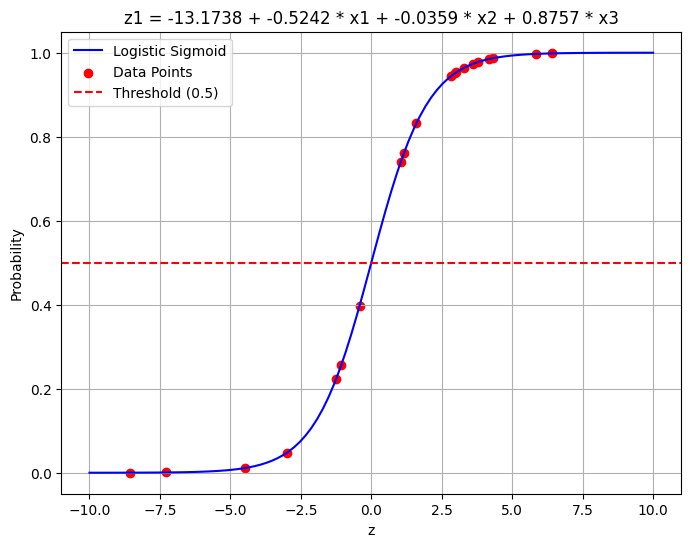

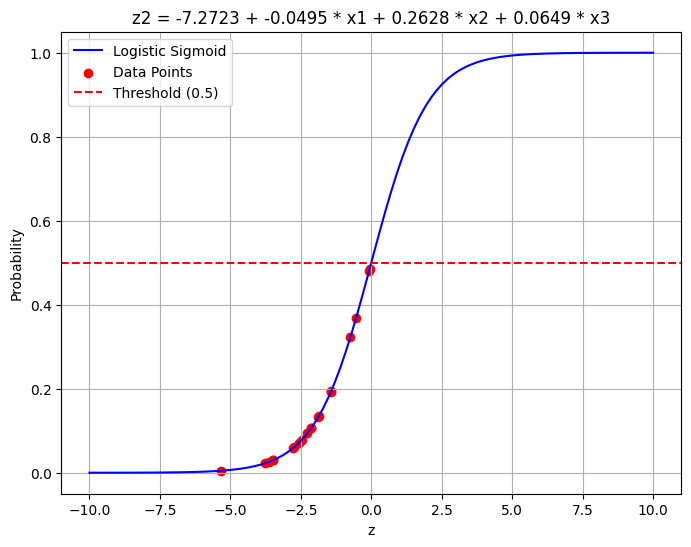

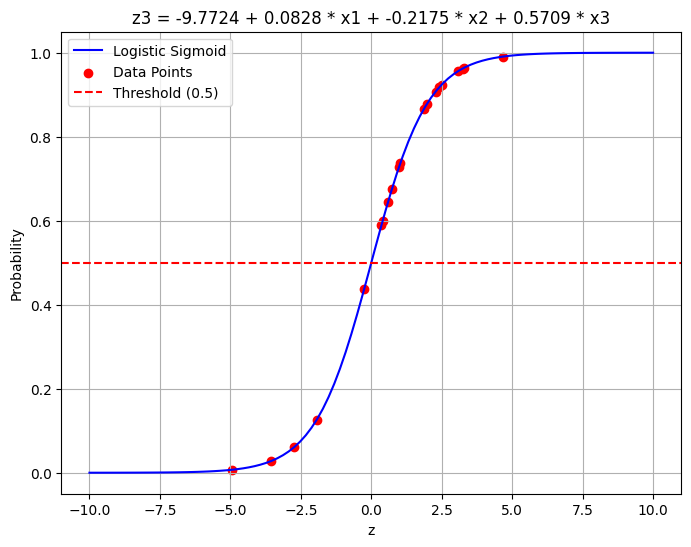

In [ ]:
create_sigmoid(1, logits1, probs1, intercept1, coefficients1)
create_sigmoid(2, logits2, probs2, intercept2, coefficients2)
create_sigmoid(3, logits3, probs3, intercept3, coefficients3)

#Performance metrics for multilabel classification

Accuracy is not a suitable metric for multilabel classification. In multilabel classification, the class distribution for each label combination may be imbalanced. Accuracy does not account for this imbalance and may be skewed towards the majority class, leading to a misleading evaluation of model performance.

$Accuracy = \frac{\text{True Positive + True Negative}}{\text{True Positive + True Negative + False Positive + False Negative}}$


In order to ameliorate this issue, we can use Precision, Recall, and F1-score, the most common metric for multilabel outputs. These metrics offer a more nuanced assessment of model performance compared to accuracy. They take into account the trade-off between false positives and false negatives, which is crucial in multilabel classification tasks where label dependencies and imbalanced class distributions are common.


 recall is the ratio of positive labels the model accurately predicted vs the sum of all labels that are actually positive and is the measure of how many positive labels the model can predict correctly.

$\text{Recall} = \frac{\text{True Positives}}{\text{True Positives} + \text{False Negatives}}$

Precision is the ratio of positive labels the model accurately predicted vs the sum of all positive labels the model predicted. It is a measure of how exact the model is with its prediction

 $\text{Precision} = \frac{\text{True Positives}}{\text{True Positives} + \text{False Positives}}$


The F1 score is the harmonic between recall and precision.

 $F_1 = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}$

In [ ]:
def calculate_precision_recall_f1(y_true, y_pred):
    num_classes = y_true.shape[1]
    accuracy = []
    precision = []
    recall = []
    f1_scores = []

    for i in range(num_classes):
        TP = np.sum((y_true[:, i] == 1) & (y_pred[:, i] == 1))
        FP = np.sum((y_true[:, i] == 0) & (y_pred[:, i] == 1))
        FN = np.sum((y_true[:, i] == 1) & (y_pred[:, i] == 0))
        TN = np.sum((y_true[:, i] == 0) & (y_pred[:, i] == 0))

        accuracy_i = (TP + TN)/(TP+FP+FN+TN) if (TP+FP+FN+TN) > 0 else 0
        precision_i = TP / (TP + FP) if (TP + FP) > 0 else 0
        recall_i = TP / (TP + FN) if (TP + FN) > 0 else 0
        f1_score_i = 2 * (precision_i * recall_i) / (precision_i + recall_i) if (precision_i + recall_i) > 0 else 0

        accuracy.append(accuracy_i)
        precision.append(precision_i)
        recall.append(recall_i)
        f1_scores.append(f1_score_i)

    avg_accuracy = np.mean(accuracy)
    avg_precision = np.mean(precision)
    avg_recall = np.mean(recall)
    avg_f1_score = np.mean(f1_scores)

    return accuracy, precision, recall, f1_scores, avg_accuracy, avg_precision, avg_recall, avg_f1_score

accuracy, precision, recall, f1_scores, avg_accuracy, avg_precision, avg_recall, avg_f1_score = calculate_precision_recall_f1(y, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Scores:", f1_scores)
print("Average accuracy:", avg_accuracy)
print("Average Precision:", avg_precision)
print("Average Recall:", avg_recall)
print("Average F1 Score:", avg_f1_score)

Accuracy: [0.9, 0.85, 0.8]
Precision: [0.9230769230769231, 0, 0.8]
Recall: [0.9230769230769231, 0.0, 0.9230769230769231]
F1 Scores: [0.9230769230769231, 0, 0.8571428571428571]
Average accuracy: 0.85
Average Precision: 0.5743589743589744
Average Recall: 0.6153846153846154
Average F1 Score: 0.5934065934065934


As we've encoded our data in a one-hot format, accuracy alone isn't a reliable metric for evaluating performance in multilabel classification. This is because accuracy simply counts the correct predictions across all classes, treating the presence of a '0' in predictions as correct. As evidenced by our results, particularly for class 2 where there's a scarcity of positive instances, accuracy may appear high (0.85) while precision, recall, and F1 scores are all 0. This disparity in scores can be attributed to the significant class imbalance in class 2, where the scarcity of positive instances hampers the classifier's ability to accurately identify them, thereby leading to low precision, recall, and F1 scores for this class.








Reference



1.   https://www.sciencedirect.com/science/article/abs/pii/S0925231222011778#:~:text=Most%20of%20the%20multi%2Dlabel,classifier%20to%20be%20biased%20toward
2.   https://www.analyticsvidhya.com/blog/2021/07/demystifying-the-difference-between-multi-class-and-multi-label-classification-problem-statements-in-deep-learning/#:~:text=As%20a%20short%20introduction%2C%20In,can%20have%20multi%2Doutput%20classes.&text=But%20these%20terms%20i.e%2C%20Multi,confuse%20even%20the%20intermediate%20developer.
3.https://medium.com/the-owl/imbalanced-multilabel-image-classification-using-keras-fbd8c60d7a4b

